# Modelación de la retención de los clientes de Beta Bank

## Tabla de contenidos

* [Introducción](#intro) 
* [Objetivos](#objective)
* [Preprocesamiento de datos](#data_review)
* [Análisis exploratorio de datos](#eda)
* [Estandarización de datos](#standarization)
* [Evaluación de modelos](#model_evaluation)
* [Validación del modelo seleccionado](#model_validation)
* [Conclusiones](#end)

## Introducción<a id='intro'></a>

Los clientes de Beta Bank se están yendo, cada mes, poco a poco. Los banqueros descubrieron que es más barato salvar a los clientes existentes que atraer nuevos.

En este proyecto se construirá un modelo para predecir si un cliente dejará el banco pronto, usando los datos sobre el comportamiento pasado de los clientes y la terminación de contratos con el banco.

## Objetivo<a id='objective'></a>

* Crear un modelo de predicción de la retención de los clientes de Beta Bank, con un valor F1 de al menos 0.59. 

## Preprocesamiento de datos <a id='data_review'></a>

Empezaremos por importar las librerías necesarias para el proyecto.

In [216]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.utils import shuffle

Se explorarán los datos de forma general.

In [217]:
bank_clients = pd.read_csv("/datasets/Churn.csv")

In [218]:
bank_clients.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Se eliminarán las columnas 'RowNumber', 'CustomerId', y 'Surname', por cuanto las mismas no son necesarias para la construcción del modelo.

In [219]:
bank_clients = bank_clients.drop(['RowNumber', 'CustomerId', 'Surname'],  axis=1)

In [220]:
bank_clients.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [221]:
bank_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           9091 non-null   float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


La columna "Tenure" contiene valores "NaN". En este caso procederemos a realizar un relleno de datos. Examinaremos las estadísticas de este campo para investigar que métrica es más conveniente para el relleno.

In [222]:
bank_clients['Tenure'].describe()

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64

No existen valores extremos, por lo cual podemos usar la media para el relleno.

In [223]:
bank_clients['Tenure'] = bank_clients['Tenure'].fillna(bank_clients['Tenure'].mean())
bank_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


## Análisis exploratorio de datos  <a id='eda'></a>

### Exploración inicial

Se procede con un análisis exploratorio de datos (EDA) de cada una de las variables. Empezaremos con las variables numéricas.

#### Histogramas

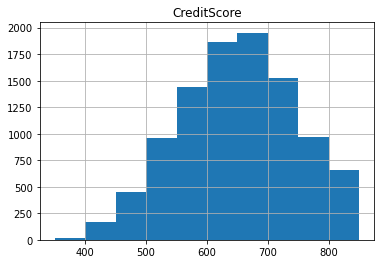

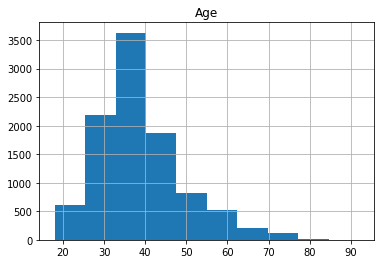

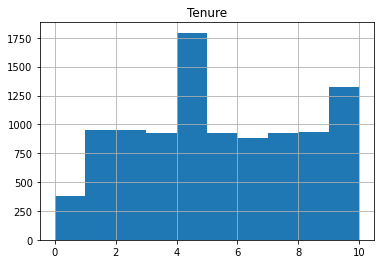

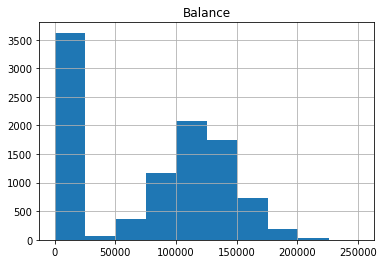

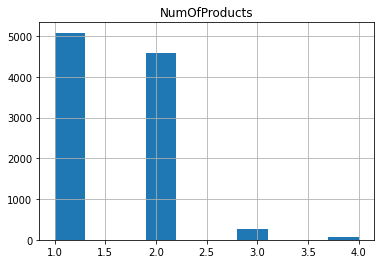

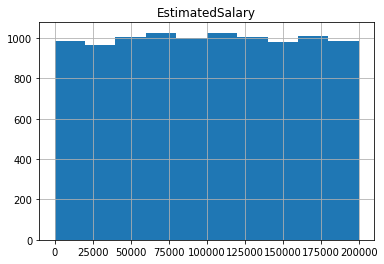

In [224]:
variables = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for i in range(len(variables)):
    bank_clients.hist(variables[i])

#### Diagramas de caja

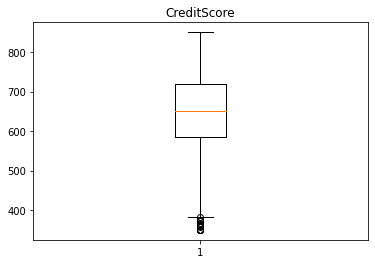

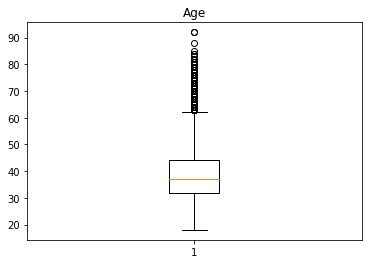

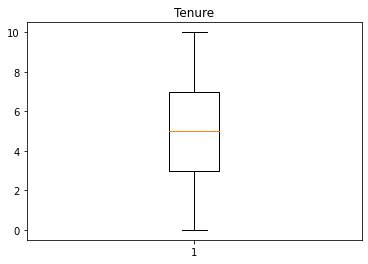

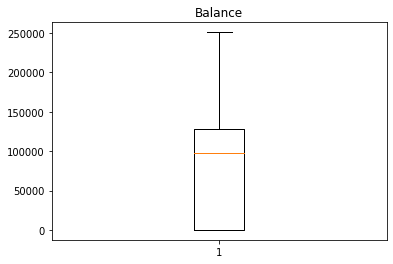

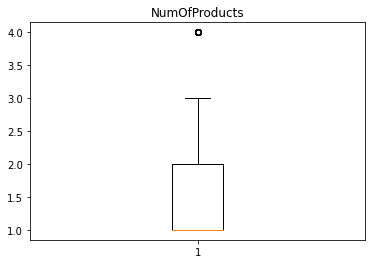

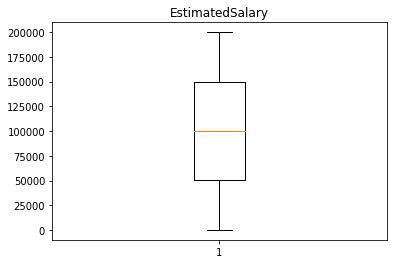

In [225]:
for variable in variables:
    plt.figure()  
    plt.boxplot(bank_clients[variable])
    plt.title(variable)

#### Estadística descriptiva

In [226]:
for variable in variables:
    print(bank_clients[variable].describe())

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64
count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64
count    10000.00000
mean         4.99769
std          2.76001
min          0.00000
25%          3.00000
50%          4.99769
75%          7.00000
max         10.00000
Name: Tenure, dtype: float64
count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64
count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
N

La distribución de los datos de variables numéricas se aproxima a lo que se esperaría de cada característica. Sin embargo, al parecer existen campos con valores atípicos, específicamente "Age" y "Credit Score". Esto se investigará con mayor profundidad. Sin embargo, se explorará primero las variables categóricas.

<AxesSubplot:>

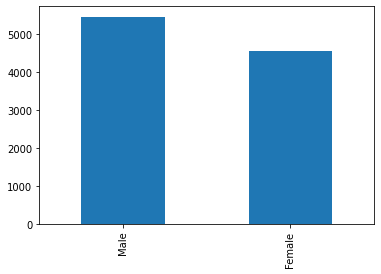

In [227]:
# Análisis de Género 

gender = bank_clients["Gender"].value_counts()
gender.plot(kind='bar')

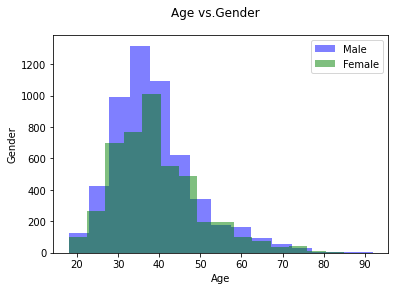

In [228]:
# Análsis de género en función de la edad

fig, ax = plt.subplots()

ax.hist(bank_clients[bank_clients["Gender"]=="Male"]["Age"], bins=15, alpha=0.5, color="blue", label="Male")
ax.hist(bank_clients[bank_clients["Gender"]=="Female"]["Age"], bins=15, alpha=0.5, color="green", label="Female")

ax.set_xlabel("Age")
ax.set_ylabel("Gender")

fig.suptitle("Age vs.Gender")

ax.legend();

<AxesSubplot:>

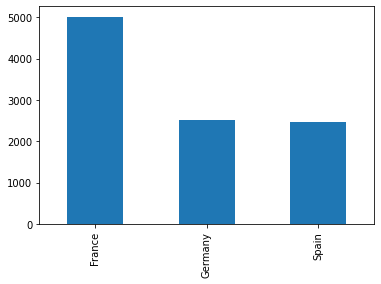

In [229]:
# Análisis Geográfico 

geography = bank_clients["Geography"].value_counts()
geography.plot(kind='bar')

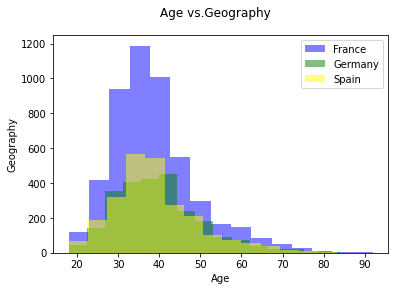

In [230]:
# Análsis geográfico en función de la edad

fig, ax = plt.subplots()

ax.hist(bank_clients[bank_clients["Geography"]=="France"]["Age"], bins=15, alpha=0.5, color="blue", label="France")
ax.hist(bank_clients[bank_clients["Geography"]=="Germany"]["Age"], bins=15, alpha=0.5, color="green", label="Germany")
ax.hist(bank_clients[bank_clients["Geography"]=="Spain"]["Age"], bins=15, alpha=0.5, color="yellow", label="Spain")

ax.set_xlabel("Age")
ax.set_ylabel("Geography")

fig.suptitle("Age vs.Geography")

ax.legend();

Los datos están equilibrados entre la cantidad de hombres y mujeres. Por otra parte, la distribución geográfica tampoco arroja anomalías. En ese sentido, el tratamiento de los datos se enfocará en las variables numéricas "Age" y "Credit Score". 

### Estudio y tratamiento de valores atípicos

In [231]:
# Funciones para el cálculo de límites de valores atípicos 

def lower_limit(Q1,Q3):
    IQR = Q3 -Q1
    lower = Q1 - 1.5*IQR
    return lower

def upper_limit(Q1,Q3):
    IQR = Q3 -Q1
    upper = Q3 + 1.5*IQR
    return upper

In [232]:
# Función para el cáculo de cuantiles

def quantiles(vector):
    Q1 = vector.quantile(0.25)
    Q3 = vector.quantile(0.75)
    return Q1, Q3

In [233]:
# Age quantiles
age = bank_clients['Age']
quantiles(age)

(32.0, 44.0)

In [234]:
# Lower limit age
lower_limit(32.0,44.0)


14.0

In [235]:
# Upper limit price
upper_limit(32.0,44.0)

62.0

In [236]:
# CreditScore quantiles
credit_score = bank_clients['CreditScore']
quantiles(credit_score)

(584.0, 718.0)

In [237]:
# Lower limit CreditScore
lower_limit(584.0, 718.0)

383.0

In [238]:
# Upper limit CreditScore
upper_limit(584.0, 718.0)

919.0

In [239]:
# Funciones para el cálculo de porcentajes de valores atípicos a ser eliminados

def atypical_percentages_lower(vector, lower_threshold, dataframe):
    sum_vector = (vector<lower_threshold).sum()
    total_df = dataframe.shape[0]
    percentage = (sum_vector/total_df)*100
    return percentage

def atypical_percentages_upper(vector, upper_threshold, dataframe):
    sum_vector = (vector>upper_threshold).sum()
    total_df = dataframe.shape[0]
    percentage = (sum_vector/total_df)*100
    return percentage

In [240]:
# Porcentaje de datos atípicos a ser eliminados (upper end "age")
atypical_percentages_upper(age, 62.0, bank_clients)

3.5900000000000003

In [241]:
# Porcentaje de datos atípicos a ser eliminados (lower end "CreditScore")
atypical_percentages_lower(credit_score, 383.0, bank_clients)

0.15

In [242]:
# Almacena los datos sin valores atípicos en un DataFrame separado

bank_clients_cleaned = bank_clients[(bank_clients['Age'] < 62.0)
                              &(bank_clients['CreditScore'] > 383.0)]
bank_clients_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9573 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9573 non-null   int64  
 1   Geography        9573 non-null   object 
 2   Gender           9573 non-null   object 
 3   Age              9573 non-null   int64  
 4   Tenure           9573 non-null   float64
 5   Balance          9573 non-null   float64
 6   NumOfProducts    9573 non-null   int64  
 7   HasCrCard        9573 non-null   int64  
 8   IsActiveMember   9573 non-null   int64  
 9   EstimatedSalary  9573 non-null   float64
 10  Exited           9573 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 897.5+ KB


Efectivamente, las variables de "Age" y "creditScore" presentaron valores atípicos. En el caso de "Age" un 3.6 % de valores por encima del valor límite superior, y para "CreditScore" un 0.15 % por debajo del límite inferior. Estos valores fueron eliminados de los registros. Se explorarán nuevamente estas variables con los datos filtrados.

### Exploración de datos sin valores atípicos 

#### Histogramas 


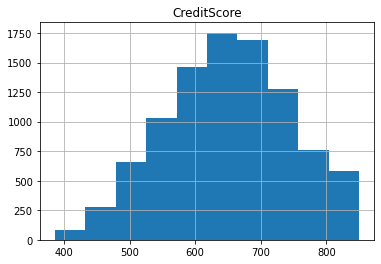

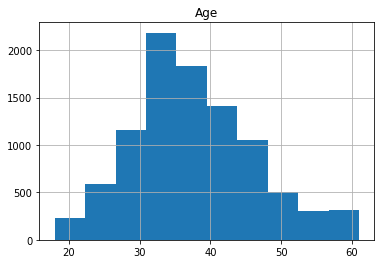

In [243]:
variables = ['CreditScore', 'Age']

for i in range(len(variables)):
    bank_clients_cleaned.hist(variables[i])

#### Diagramas de caja 

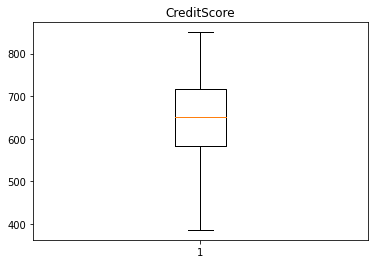

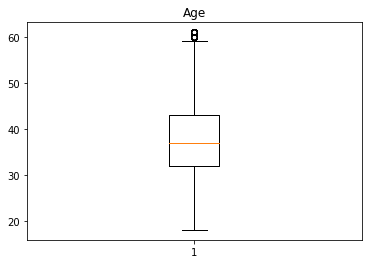

In [244]:
for variable in variables:
    plt.figure()  
    plt.boxplot(bank_clients_cleaned[variable])
    plt.title(variable)

#### Estadística descriptiva

In [245]:
for variable in variables:
    print(bank_clients_cleaned[variable].describe())

count    9573.000000
mean      650.768516
std        96.021657
min       386.000000
25%       584.000000
50%       652.000000
75%       717.000000
max       850.000000
Name: CreditScore, dtype: float64
count    9573.000000
mean       37.650475
std         8.639096
min        18.000000
25%        32.000000
50%        37.000000
75%        43.000000
max        61.000000
Name: Age, dtype: float64


### Análisis de correlación

En esta sección se investigarán las correlaciones entre las variables predictoras y objetivo.

In [246]:
# Creación de matriz de correlación

corrM = bank_clients_cleaned.corr()
 
corrM

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.012953,-0.002618,0.008360,0.011070,-0.002457,0.019989,0.002021,-0.015156
Age,-0.012953,1.000000,-0.015142,0.041971,-0.033346,-0.012920,0.012614,-0.004467,0.360007
Tenure,-0.002618,-0.015142,1.000000,-0.009276,0.014428,0.024762,-0.029378,0.011400,-0.014823
Balance,0.008360,0.041971,-0.009276,1.000000,-0.305203,-0.012307,-0.006433,0.010524,0.115758
NumOfProducts,0.011070,-0.033346,0.014428,-0.305203,1.000000,0.001690,0.011330,0.011394,-0.049881
HasCrCard,-0.002457,-0.012920,0.024762,-0.012307,0.001690,1.000000,-0.011821,-0.011812,-0.007288
IsActiveMember,0.019989,0.012614,-0.029378,-0.006433,0.011330,-0.011821,1.000000,-0.008828,-0.141429
EstimatedSalary,0.002021,-0.004467,0.011400,0.010524,0.011394,-0.011812,-0.008828,1.000000,0.010110
Exited,-0.015156,0.360007,-0.014823,0.115758,-0.049881,-0.007288,-0.141429,0.010110,1.000000


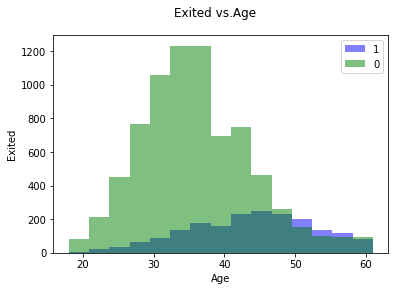

In [247]:
# Análsis de género en función de la edad

fig, ax = plt.subplots()

ax.hist(bank_clients_cleaned[bank_clients_cleaned["Exited"]==1]["Age"], bins=15, alpha=0.5, color="blue", label=1)
ax.hist(bank_clients_cleaned[bank_clients_cleaned["Exited"]==0]["Age"], bins=15, alpha=0.5, color="green", label=0)

ax.set_xlabel("Age")
ax.set_ylabel("Exited")

fig.suptitle("Exited vs.Age")

ax.legend();

Es interesante apreciar que la correlación más fuerte (positiva) con la variable objetivo "Exited" esta asociada con la característica "Age" con un coeficiente de correlación de 0.36. El rango de edad pico en el que las personas deciden salir del banco esta entre los 40 y 50 años. 

### Conclusiones intermedias

* Las variables de "Age" y "creditScore" presentaron valores atípicos. En el caso de "Age" un 3.6 % de valores por encima del valor límite superior, y para "CreditScore" un 0.15 % por debajo del límite inferior. Estos valores fueron eliminados de los registros.

* Es interesante apreciar que la correlación más fuerte (positiva) con la variable objetivo "Exited" esta asociada con la característica "Age" con un coeficiente de correlación de 0.36. El rango de edad pico en el que las personas deciden salir del banco esta entre los 40 y 50 años.


## Estandarización de datos  <a id='standarization'></a>

In [248]:
# Codificación one-hot:

bank_clients_ohe = pd.get_dummies(bank_clients_cleaned, drop_first=True)


# Estandarización

target = bank_clients_ohe['Exited']
features = bank_clients_ohe.drop('Exited', axis=1)
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.20, random_state=12345)

print(features_train.head())

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
2401          630   30     3.0       0.00              2          0   
7127          624   44     3.0       0.00              2          1   
6423          652   41     8.0  115144.68              1          1   
7621          661   39     5.0       0.00              2          0   
4820          484   32     3.0       0.00              2          1   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
2401               1         10486.69                  0                1   
7127               0         88407.51                  0                0   
6423               0        188905.43                  0                1   
7621               0        181461.46                  0                0   
4820               1        139390.99                  0                0   

      Gender_Male  
2401            1  
7127            1  
6423            1  
7621            1  
4820      

## Evaluación de modelos <a id='model_evaluation'></a>

### Frecuencias de clases  

Nuestra variable objetivo corresponde a la columna "Exited", en la que se registró si un cliente salió (valor 1) o no (valor = 0) del banco. Esta variable ya se encuentra codificada numéricamente, por lo que se puede hacer un análisis de las clases.

0    0.798705
1    0.201295
Name: Exited, dtype: float64


<AxesSubplot:>

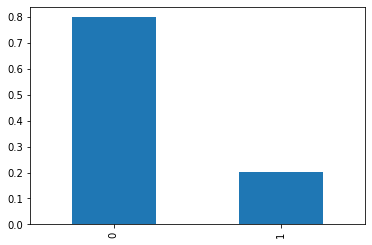

In [249]:
class_frequency = bank_clients_cleaned["Exited"].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

El análisis de clases determina que existe un desbalance entre las mismas. Las personas que salen del banco representan el 20 % y las que se quedan el 80%. Esta proporción representa un desbalance inherente al tipo de problema analizado, es decir, es lo que podríamos esperar (menos personas salen que las que se quedan en el banco)

A continuación procederemos a entrenar el modelo sin corregir este desbalance.

### Construcción de modelos sin ajuste de clases 

Los modelos que se evaluarán serán: 1) regresión logística, 2) árbol de decisión, y 3) bosque aleatorio. En esta sección no se realizará ningún ajuste de clase.  

#### Regresión logística 

In [250]:
# Entrenamiento del modelo sin corrección de desbalance de clases
 
# Entrenamiento del modelo

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)


LogisticRegression(random_state=12345, solver='liblinear')

In [251]:
# Cálculos de exactitud modelo de regresión logística sin corrección de desbalance de clases

predictions_train = model.predict(features_train)
predictions_test = model.predict(features_test)
accuracy_train = accuracy_score(target_train,predictions_train)
accuracy_test = accuracy_score(target_test,predictions_test)

print("Exactitud con datos de entrenamiento:", accuracy_train)
print("Exactitud con datos de prueba:", accuracy_test)

Exactitud con datos de entrenamiento: 0.8002089318359885
Exactitud con datos de prueba: 0.795822454308094


In [252]:
# Cálculo del valor F1 modelo regresión logística sin ajuste de clases 

print(f1_score(target_test, predictions_test))

0.07565011820330969


In [253]:
# Cálculo de AUC-ROC modelo regresión logística sin ajuste de clases

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)

print(auc_roc)

0.6742541254125413


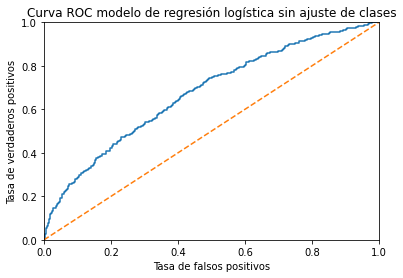

In [254]:
# Curva ROC modelo regresión logística sin ajuste de clases

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC modelo de regresión logística sin ajuste de clases')
plt.show()

#### Árbol de decisión 

In [255]:
# Evaluación de exactitud de modelo de árbol de decisión con datos de entrenamiento sin ajuste de clases

best_model = None
best_result = 0

for depth in range(1, 6):
	model = DecisionTreeClassifier(random_state=12345, max_depth=depth) # crea un modelo con la profundidad proporcionada
	model.fit(features_train,target_train) # entrena el modelo 
	predictions = model.predict(features_train) #hace predicciones con daos de entrenamiento
	result = accuracy_score(target_train,predictions) # calcula la exactitud
    
	if result > best_result:
		best_model = model
		best_result = result
            
print("Exactitud del mejor modelo en el conjunto de entrenamiento:", best_result)

Exactitud del mejor modelo en el conjunto de entrenamiento: 0.8621049882475842


In [256]:
# Evaluación de exactitud de modelo de árbol de decisión con datos de prueba sin ajuste de clases

best_model = None
best_result = 0
for depth in range(1, 6):
	model = DecisionTreeClassifier(random_state=12345, max_depth=depth) # crea un modelo con la profundidad proporcionada
	model.fit(features_train,target_train) # entrena el modelo 
	predictions = model.predict(features_test) # obtiene las predicciones del modelo
	result = accuracy_score(target_test,predictions) # calcula la exactitud
    
	if result > best_result:
		best_model = model
		best_result = result
            
print("Exactitud del mejor modelo en el conjunto de prueba:", best_result)

Exactitud del mejor modelo en el conjunto de prueba: 0.852219321148825


In [257]:
# Cálculo de F1 modelo de árbol de decisión sin ajuste de clases

best_model = None
best_result = 0

for depth in range(1, 6):
	model = DecisionTreeClassifier(random_state=12345, max_depth=depth) # crea un modelo con la profundidad proporcionada
	model.fit(features_train,target_train) # entrena el modelo 
	predictions = model.predict(features_test) #hace predicciones 
	result = f1_score(target_test, predictions) # calcula F1
    
	if result > best_result:
		best_model = model
		best_result = result
            
print("F1 del mejor modelo:", best_result)

F1 del mejor modelo: 0.5413290113452188


In [258]:
# Cálculo de AUC-ROC modelo de árbol de decisión sin ajuste de clases

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)

print(auc_roc)

0.8317714521452146


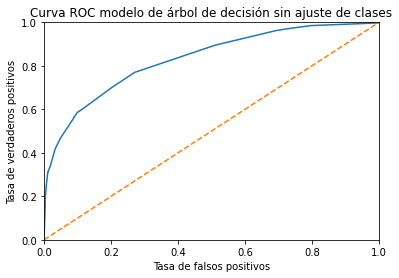

In [259]:
# Curva ROC modelo de árbol de decisión sin ajuste de clases

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC modelo de árbol de decisión sin ajuste de clases')
plt.show()

#### Bosque aleatorio

In [260]:
# Evaluación de exactitud de modelo de bosque aleatorio con datos de entrenamiento sin ajuste de clases

best_score = 0
best_est = 0

for est in range(1,11): # selecciona el rango del hiperparámetro
    model = RandomForestClassifier(random_state=12345, n_estimators=est) # configura el número de árboles
    model.fit(features_train,target_train) # entrena el modelo en el conjunto de entrenamiento
    score = model.score(features_train,target_train) # calcula la puntuación de accuracy en el conjunto de entrenamiento
    if score > best_score:
        best_score = score #guarda la mejor puntuación de accuracy en el conjunto de entrenamiento
        best_est = est# guarda el número de estimadores que corresponden a la mejor puntuación de accuracy

print("Exactitud del mejor modelo en el conjunto de entrenamiento (n_estimators = {}): {}".format(best_est, best_score))


Exactitud del mejor modelo en el conjunto de entrenamiento (n_estimators = 9): 0.9877252546356751


In [261]:
# Evaluación de exactitud de modelo de bosque aleatorio con datos de prueba sin ajuste de clases

best_score = 0
best_est = 0

for est in range(1,11): # selecciona el rango del hiperparámetro
    model = RandomForestClassifier(random_state=12345, n_estimators=est) # configura el número de árboles
    model.fit(features_train,target_train) # entrena el modelo en el conjunto de entrenamiento
    score = model.score(features_test,target_test) # calcula la puntuación de accuracy en el conjunto de validación
    if score > best_score:
        best_score = score #guarda la mejor puntuación de accuracy en el conjunto de validación
        best_est = est# guarda el número de estimadores que corresponden a la mejor puntuación de accuracy

print("Exactitud del mejor modelo en el conjunto de prueba (n_estimators = {}): {}".format(best_est, best_score))


Exactitud del mejor modelo en el conjunto de prueba (n_estimators = 10): 0.8459530026109661


In [262]:
# Cálculo del valor F1 modelo de bosque aleatorio con datos de prueba sin ajuste de clases

best_score = 0
best_est = 0

for est in range(1,11): # selecciona el rango del hiperparámetro
    model = RandomForestClassifier(random_state=12345, n_estimators=est) # configura el número de árboles
    model.fit(features_train,target_train) # entrena el modelo en el conjunto de entrenamiento
    predictions = model.predict(features_test) #hace predicciones
    score = f1_score(target_test, predictions) # calcula F1 
    
    if score > best_score:
        best_score = score #guarda la mejor puntuación 
        best_est = est# guarda el número de estimadores que corresponden a la mejor puntuación 
        
print("F1 del mejor modelo (n_estimators = {}): {}".format(best_est, best_score))

F1 del mejor modelo (n_estimators = 9): 0.5538922155688623


In [263]:
# Cálculo de AUC-ROC modelo de bosque aleatorio sin ajuste de clases

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)

print(auc_roc)

0.8009026402640265


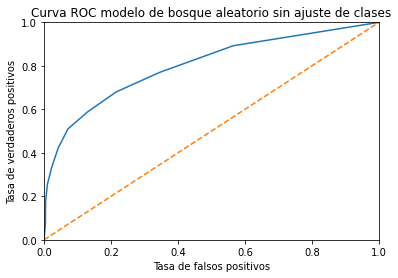

In [264]:
# Curva ROC modelo de bosque aleatorio sin ajuste de clases

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC modelo de bosque aleatorio sin ajuste de clases')
plt.show()

#### Conclusiones intermedias 

Sin ajuste de clases, dos modelos logran cumplir con el objetivo de F1 al menos de 0.54: 1) árbol de decisión y 2) bosque aleatorio. A diferencia del modelo de regresión logística, estos dos modelos brindan buenos resultados incluso sin balancear las clases.

### Ajuste de clases 

Para todos los modelos, se ajustarán las clases mediante tres métodos: 1) usar el parámetro "class_weight='balanced'", 2) sobremuestreo y 3) submuestreo.

#### Regresión logística

##### Parámetro "class_weight='balanced'

In [265]:
# Cálculos de exactitud modelo de regresión logística con ajuste de clases usando el parámetro "class_weight

model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predictions_train = model.predict(features_train)
predictions_test = model.predict(features_test)
accuracy_train = accuracy_score(target_train,predictions_train)
accuracy_test = accuracy_score(target_test,predictions_test)

print("Exactitud con datos de entrenamiento:", accuracy_train)
print("Exactitud con datos de prueba:", accuracy_test)

Exactitud con datos de entrenamiento: 0.6745886654478976
Exactitud con datos de prueba: 0.6610966057441253


In [266]:
# Cálculo de F1 con ajuste de clases usando el parámetro "class_weight" 

model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
print('F1:', f1_score(target_test, predicted_test))

F1: 0.45961698584512906


In [267]:
# Cálculo de AUC-ROC modelo de regresión logística con ajuste de clases usando el parámetro "class_weight" 

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)

print(auc_roc)

0.7399108910891089


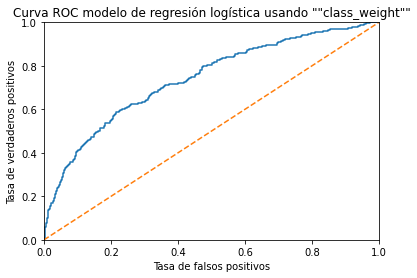

In [268]:
# Curva ROC modelo de bosque aleatorio sin ajuste de clases

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC modelo de regresión logística usando ""class_weight""')
plt.show()

##### Sobremuestreo

In [269]:
# Ajuste de clases usando sobremuestreo

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(
    features_train, target_train, 20
)

In [270]:
# Cáculo de exactitud modelo de regresión logística con sobremuestreo

model.fit(features_upsampled,target_upsampled)
predictions_train = model.predict(features_train)
predictions_test = model.predict(features_test)
accuracy_train = accuracy_score(target_train,predictions_train)
accuracy_test = accuracy_score(target_test,predictions_test)

print("Exactitud con datos de entrenamiento:", accuracy_train)
print("Exactitud con datos de prueba:", accuracy_test)

Exactitud con datos de entrenamiento: 0.7148080438756855
Exactitud con datos de prueba: 0.7107049608355092


In [271]:
# Cáculo de F1 modelo de regresión logística con sobremuestreo

print('F1:', f1_score(target_test, predicted_test))

F1: 0.45961698584512906


In [272]:
# Cálculo de AUC-ROC modelo de regresión logística con sobremuestreo 

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)

print(auc_roc)

0.7710000000000001


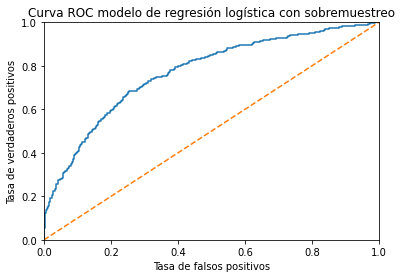

In [273]:
# Curva ROC modelo de regresión logística con sobremuestreo

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC modelo de regresión logística con sobremuestreo')
plt.show()

##### Submuestreo

In [274]:
# Ajuste de clases  usando submuestreo

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.1
)


In [275]:
# Cáculo de exactitud modelo de regresión logística con submuestreo

model.fit(features_downsampled,target_downsampled)
predictions_train = model.predict(features_train)
predictions_test = model.predict(features_test)
accuracy_train = accuracy_score(target_train,predictions_train)
accuracy_test = accuracy_score(target_test,predictions_test)

print("Exactitud con datos de entrenamiento:", accuracy_train)
print("Exactitud con datos de prueba:", accuracy_test)

Exactitud con datos de entrenamiento: 0.6600940193261948
Exactitud con datos de prueba: 0.6469973890339425


In [276]:
# Cáculo de F1 modelo de regresión logística con submuestreo

print('F1:', f1_score(target_test, predicted_test))

F1: 0.45961698584512906


In [277]:
# Cálculo de AUC-ROC modelo de regresión logística con submuestreo

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)

print(auc_roc)

0.7262458745874587


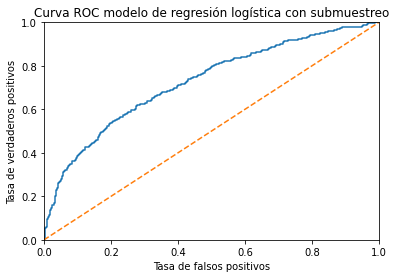

In [278]:
# Curva ROC modelo de regresión logística con submuestreo

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC modelo de regresión logística con submuestreo')
plt.show()

#### Árbol de decisión

##### Parámetro "class_weight='balanced'

In [279]:
# Evaluación de exactitud de modelo de árbol de decisión con datos 
# de entrenamiento con ajuste de clases usando el parámetro "class_weight"

best_model = None
best_result = 0

for depth in range(1, 6):
	model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced') # crea un modelo con la profundidad proporcionada
	model.fit(features_train,target_train) # entrena el modelo 
	predictions = model.predict(features_train) #hace predicciones con daos de entrenamiento
	result = accuracy_score(target_train,predictions) # calcula la exactitud
    
	if result > best_result:
		best_model = model
		best_result = result
            
print("Exactitud del mejor modelo en el conjunto de entrenamiento:", best_result)

Exactitud del mejor modelo en el conjunto de entrenamiento: 0.7807521546095586


In [280]:
# Evaluación de exactitud de modelo de árbol de decisión con datos 
# de prueba con ajuste de clases usando el parámetro "class_weight"

best_model = None
best_result = 0
for depth in range(1, 6):
	model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced') # crea un modelo con la profundidad proporcionada
	model.fit(features_train,target_train) # entrena el modelo 
	predictions = model.predict(features_test) # obtiene las predicciones del modelo
	result = accuracy_score(target_test,predictions) # calcula la exactitud
    
	if result > best_result:
		best_model = model
		best_result = result
            
print("Exactitud del mejor modelo en el conjunto de prueba:", best_result)

Exactitud del mejor modelo en el conjunto de prueba: 0.7754569190600522


In [281]:
# Cáculo de F1 del modelo de árbol de decisión con ajuste de clases usando "class_weight"

best_model = None
best_result = 0

for depth in range(1, 6):
	model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced') # crea un modelo con la profundidad proporcionada
	model.fit(features_train,target_train) # entrena el modelo 
	predictions = model.predict(features_test) #hace predicciones 
	result = f1_score(target_test, predictions) # calcula F1
    
	if result > best_result:
		best_model = model
		best_result = result
            
print("F1 del mejor modelo:", best_result)

F1 del mejor modelo: 0.5674931129476584


In [282]:
# Cálculo de AUC-ROC modelo de árbol de decisión con ajuste de clases usando "class_weight"

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)

print(auc_roc)

0.8395231023102311


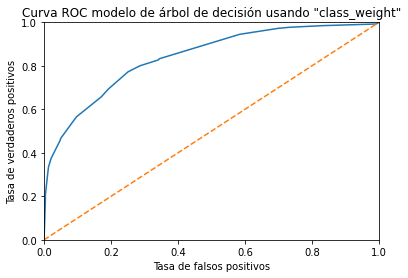

In [283]:
# Curva ROC modelo de árbol de decisión con ajuste de clases usando "class_weight"

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC modelo de árbol de decisión usando "class_weight"')
plt.show()

##### Sobremuestreo

In [284]:
# Ajuste de clases usando sobremuestreo

features_upsampled, target_upsampled = upsample(
    features_train, target_train, 20
)

In [285]:
# Cáculo de exactitud modelo de árbol de decisión con sobremuestreo

model.fit(features_upsampled,target_upsampled)
predictions_train = model.predict(features_train)
predictions_test = model.predict(features_test)
accuracy_train = accuracy_score(target_train,predictions_train)
accuracy_test = accuracy_score(target_test,predictions_test)

print("Exactitud con datos de entrenamiento:", accuracy_train)
print("Exactitud con datos de prueba:", accuracy_test)

Exactitud con datos de entrenamiento: 0.7607730477931575
Exactitud con datos de prueba: 0.7540469973890339


In [286]:
# Cáculo de F1 modelo de árbol de decisión con sobremuestreo

print('F1:', f1_score(target_test, predicted_test))

F1: 0.45961698584512906


In [287]:
# Cálculo de AUC-ROC modelo de árbol de decisión con sobremuestreo 

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)

print(auc_roc)

0.8395231023102311


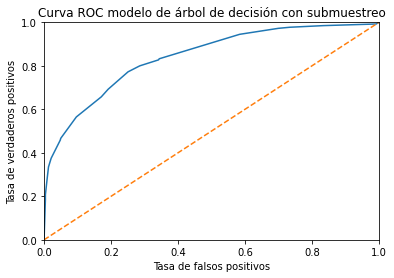

In [288]:
# Curva ROC modelo de árbol de decisión con sobremuestreo

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC modelo de árbol de decisión con submuestreo')
plt.show()

##### Submuestreo

In [289]:
# Ajuste de clases usando submuestreo

features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.1
)

In [290]:
# Cáculo de exactitud modelo de árbol de decisión con submuestreo

model.fit(features_downsampled,target_downsampled)
predictions_train = model.predict(features_train)
predictions_test = model.predict(features_test)
accuracy_train = accuracy_score(target_train,predictions_train)
accuracy_test = accuracy_score(target_test,predictions_test)

print("Exactitud con datos de entrenamiento:", accuracy_train)
print("Exactitud con datos de prueba:", accuracy_test)

Exactitud con datos de entrenamiento: 0.8072603813006006
Exactitud con datos de prueba: 0.8026109660574412


In [291]:
# Cáculo de F1 modelo de árbol de decisión con submuestreo

print('F1:', f1_score(target_test, predicted_test))

F1: 0.45961698584512906


In [292]:
# Cálculo de AUC-ROC modelo de árbol de decisión con submuestreo 

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)

print(auc_roc)

0.8164735973597359


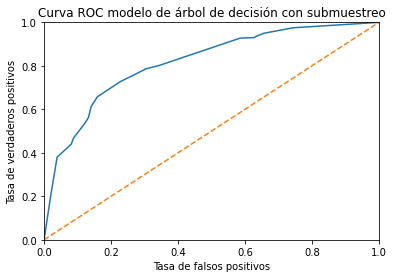

In [293]:
# Curva ROC modelo de árbol de decisión con submuestreo

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC modelo de árbol de decisión con submuestreo')
plt.show()

#### Bosque Aleatorio

#####  Parámetro "class_weight='balanced'

In [294]:
# Evaluación de exactitud de modelo de bosque aleatorio com datos de entrenamiento 
# con ajuste de clases "class_weight"

best_score = 0
best_est = 0

for est in range(1,11): # selecciona el rango del hiperparámetro
    model = RandomForestClassifier(random_state=12345, n_estimators=est, class_weight='balanced') # configura el número de árboles
    model.fit(features_train,target_train) # entrena el modelo en el conjunto de entrenamiento
    score = model.score(features_train,target_train) # calcula la puntuación de accuracy en el conjunto de entrenamiento
    if score > best_score:
        best_score = score #guarda la mejor puntuación de accuracy en el conjunto de entrenamiento
        best_est = est# guarda el número de estimadores que corresponden a la mejor puntuación de accuracy

print("Exactitud del mejor modelo en el conjunto de entrenamiento (n_estimators = {}): {}".format(best_est, best_score))


Exactitud del mejor modelo en el conjunto de entrenamiento (n_estimators = 9): 0.9869417602507182


In [295]:
# Evaluación de exactitud de modelo de bosque aleatorio con datos de prueba 
# con ajuste de clases "class_weight"

best_score = 0
best_est = 0

for est in range(1,11): # selecciona el rango del hiperparámetro
    model = RandomForestClassifier(random_state=12345, n_estimators=est, class_weight='balanced') # configura el número de árboles
    model.fit(features_train,target_train) # entrena el modelo en el conjunto de entrenamiento
    score = model.score(features_test,target_test) # calcula la puntuación de accuracy en el conjunto de validación
    if score > best_score:
        best_score = score #guarda la mejor puntuación de accuracy en el conjunto de validación
        best_est = est# guarda el número de estimadores que corresponden a la mejor puntuación de accuracy

print("Exactitud del mejor modelo en el conjunto de prueba (n_estimators = {}): {}".format(best_est, best_score))


Exactitud del mejor modelo en el conjunto de prueba (n_estimators = 10): 0.8438642297650131


In [296]:
# Cálculo de F1 del modelo de bosque aleatorio con ajuste de clases "class_weight"

best_score = 0
best_est = 0

for est in range(1,11): # selecciona el rango del hiperparámetro
    model = RandomForestClassifier(random_state=12345, n_estimators=est, class_weight='balanced') # configura el número de árboles
    model.fit(features_train,target_train) # entrena el modelo en el conjunto de entrenamiento
    predictions = model.predict(features_test) #hace predicciones
    score = f1_score(target_test, predictions) # calcula F1 
    
    if score > best_score:
        best_score = score #guarda la mejor puntuación 
        best_est = est# guarda el número de estimadores que corresponden a la mejor puntuación 
        
print("F1 del mejor modelo (n_estimators = {}): {}".format(best_est, best_score))

F1 del mejor modelo (n_estimators = 9): 0.5402985074626866


In [297]:
# Cálculo de AUC-ROC modelo de bosque aleatorio con ajuste de clases "class_weight" 

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)

print(auc_roc)

0.806125412541254


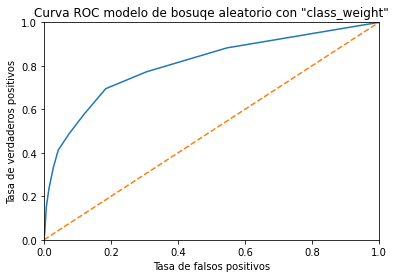

In [298]:
# Curva ROC modelo de árbol de decisión con ajuste de clases "class_weight"

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC modelo de bosuqe aleatorio con "class_weight"')
plt.show()

##### Sobremuestreo

In [299]:
# Ajuste de clases usando sobremuestreo

features_upsampled, target_upsampled = upsample(
    features_train, target_train, 20
)

In [300]:
# Cálculo de exactitud modelo de bosque aleatorio con sobremuestreo

model.fit(features_upsampled,target_upsampled)
predictions_train = model.predict(features_train)
predictions_test = model.predict(features_test)
accuracy_train = accuracy_score(target_train,predictions_train)
accuracy_test = accuracy_score(target_test,predictions_test)

print("Exactitud con datos de entrenamiento:", accuracy_train)
print("Exactitud con datos de prueba:", accuracy_test)

Exactitud con datos de entrenamiento: 0.9981718464351006
Exactitud con datos de prueba: 0.8381201044386423


In [301]:
# Cáculo de F1 modelo de bosque aleatorio con sobremuestreo

print('F1:', f1_score(target_test, predicted_test))

F1: 0.45961698584512906


In [302]:
# Cálculo de AUC-ROC modelo de árbol de decisión con sobremuestreo 

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)

print(auc_roc)

0.8035247524752475


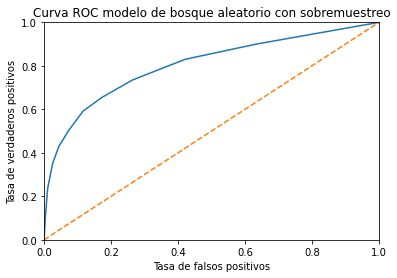

In [303]:
# Curva ROC modelo de árbol de decisión con sobremuestreo

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC modelo de bosque aleatorio con sobremuestreo')
plt.show()

##### Submuestreo

In [304]:
# Ajuste de clases usando submuestreo

features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.1
)

In [305]:
# Cálculo de exactitud modelo de bosque aleatorio con submuestreo

model.fit(features_downsampled,target_downsampled)
predictions_train = model.predict(features_train)
predictions_test = model.predict(features_test)
accuracy_train = accuracy_score(target_train,predictions_train)
accuracy_test = accuracy_score(target_test,predictions_test)

print("Exactitud con datos de entrenamiento:", accuracy_train)
print("Exactitud con datos de prueba:", accuracy_test)

Exactitud con datos de entrenamiento: 0.6918255419169496
Exactitud con datos de prueba: 0.6219321148825065


In [306]:
# Cáculo de F1 modelo de bosque aleatorio con submuestreo

print('F1:', f1_score(target_test, predicted_test))

F1: 0.45961698584512906


In [307]:
# Cálculo de AUC-ROC modelo de bosque aleatorio con submuestreo 

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)

print(auc_roc)

0.8168168316831683


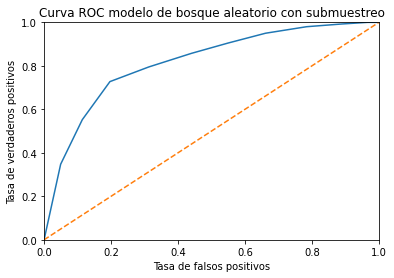

In [308]:
# Curva ROC modelo de bosque aleatorio con submuestreo

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC modelo de bosque aleatorio con submuestreo')
plt.show()

#### Resumen de resultados

|                                             | **Exactitud con datos  de entrenamiento** | **Exactitud con datos  de prueba** | **F1** | **AUC-ROC** |
|---------------------------------------------|:-----------------------------------------:|:----------------------------------:|:-----------------------:|:-----------:|
|       _Regresión logística sin ajuste_      |                    0.80                   |                0.80                |           0.08          |     0.67    |
| _Regresión logística class_weight=balanced_ |                    0.67                   |                0.66                |           0.50          |     0.74    |
|   _Regresión logística con sobremuestreo_   |                    0.71                   |                0.71                |           0.46          |     0.77    |
|    _Regresión logística con submuestreo_    |                    0.66                   |                0.65                |           0.46          |     0.73    |
|       _Árbol de decisión  sin ajuste_       |                    0.86                   |                0.85                |           0.54          |     0.83    |
|  _Árbol de decisión class_weight=balanced_  |                    0.78                   |                0.77                |           0.57          |     0.84    |
|    _Árbol de decisión con sobremuestreo_    |                    0.76                   |                0.75                |           0.46          |     0.84    |
|     _Árbol de decisión con submuestreo_     |                    0.81                   |                0.80                |           0.46          |     0.82    |
|        _Bosque aleatorio sin ajuste_        |                    0.99                   |                0.85                |           0.55          |     0.80    |
|   _Bosque aleatorio class_weight=balanced_  |                    0.97                   |                0.84                |           0.54          |     0.81    |
|     _Bosque aleatorio con sobremuestreo_    |                    1.00                   |                0.84                |           0.46          |     0.80    |
|      _Bosque aleatorio con submuestreo_     |                    0.69                   |                0.62                |           0.46          |     0.82    |

**Conclusión intermedia**

El mejor modelo de predicción de la retención de clientes es el árbol de decisión con un F1 igual a 0.57. El mismo utilizó datos de clasificación balanceados por el método "class_weight='balanced'", y presentó sobreajuste mínimo (+1 %).  Sin embargo, el modelo no cumple con la meta requerida (F1=0.59). En la sección de validación se intentará optimizar aún mas este modelo para alcanzar la meta.

## Validación del modelo seleccionado <a id='model_validation'></a>

Para la validación, se generará un nuevo conjunto de datos (de validación), para correr el modelo de árbol de decisión. La segmentación corresponde a una proporción 60 % de datos de entrenamiento, 20% de prueba y 20 % de validación.

In [309]:
# Segmentación de datos de validación

target = bank_clients_ohe['Exited']
features = bank_clients_ohe.drop('Exited', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)

In [310]:
# Evaluación de exactitud de modelo de árbol de decisión con datos 
# de entrenamiento con ajuste de clases usando el parámetro "class_weight"

best_model = None
best_result = 0

for depth in range(1, 7):
	model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced') # crea un modelo con la profundidad proporcionada
	model.fit(features_train,target_train) # entrena el modelo 
	predictions = model.predict(features_train) #hace predicciones con daos de entrenamiento
	result = accuracy_score(target_train,predictions) # calcula la exactitud
    
	if result > best_result:
		best_model = model
		best_result = result
            
print("Exactitud del mejor modelo en el conjunto de entrenamiento:", best_result)

Exactitud del mejor modelo en el conjunto de entrenamiento: 0.7944003343083995


In [311]:
# Evaluación de exactitud de modelo de árbol de decisión con datos 
# de validación con ajuste de clases usando el parámetro "class_weight"

best_model = None
best_result = 0
for depth in range(1, 7):
	model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced') # crea un modelo con la profundidad proporcionada
	model.fit(features_train,target_train) # entrena el modelo 
	predictions = model.predict(features_test) # obtiene las predicciones del modelo
	result = accuracy_score(target_test,predictions) # calcula la exactitud
    
	if result > best_result:
		best_model = model
		best_result = result
            
print("Exactitud del mejor modelo en el conjunto de prueba:", best_result)

Exactitud del mejor modelo en el conjunto de prueba: 0.77911227154047


In [312]:
# F1 modelo de árbol de decisión con datos de validación 

best_model = None
best_result = 0

for depth in range(1, 7):
	model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced') # crea un modelo con la profundidad proporcionada
	model.fit(features_train,target_train) # entrena el modelo 
	predictions = model.predict(features_valid) #hace predicciones 
	result = f1_score(target_valid, predictions) # calcula F1
    
	if result > best_result:
		best_model = model
		best_result = result
            
print("F1:", best_result)

F1: 0.5873015873015873


In [313]:
# Cálculo de AUC-ROC

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.8408761628793656


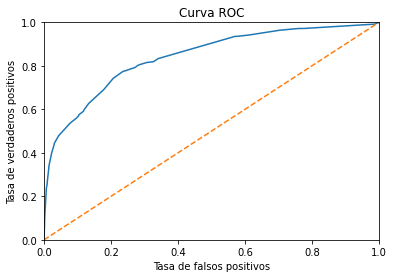

In [314]:
# Curva ROC

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

**Conclusión intermedia**

Para predecir la retención de clientes, el modelo de árbol de decisión, balanceado con el parámetro "class_weight=balanced",  fue validado como el mejor modelo con un resultado F1 de 0.59 (cumple la meta establecida). Para obtener este resultado se modificó ligeramente el rango de optimización del hiperparámetro "profundidad del árbol". El modelo presenta un sobreajuste mínimo (+1 %) y un valor AUC-ROC de 0.84. Por lo cual el modelo es aceptable.   

## Conclusiones <a id='end'></a>

1. Las variables de "Age" y "creditScore" presentaron valores atípicos. En el caso de "Age" un 3.6 % de valores por encima del valor límite superior, y para "CreditScore" un 0.15 % por debajo del límite inferior. Estos valores fueron eliminados de los registros.

2. Es interesante apreciar que la correlación más fuerte (positiva) con la variable objetivo "Exited" esta asociada con la característica "Age" con un coeficiente de correlación de 0.36. El rango de edad pico en el que las personas deciden salir del banco esta entre los 40 y 50 años.

3. Sin ajuste de clases, dos modelos logran cumplir con el objetivo de F1 al menos de 0.54: 1) árbol de decisión y 2) bosque aleatorio. A diferencia del modelo de regresión logística, estos dos modelos brindan buenos resultados incluso sin balancear las clases.

4. En la etapa de prueba, el mejor modelo de predicción de la retención de clientes fue el árbol de decisión con un F1 igual a 0.57. El mismo utilizó datos de prueba balanceados por el método "class_weight='balanced'". Con esta configuración, se obtuvo un sobreajuste mínimo (+1 %). Los resultados de la exactitud y el coeficiente AUC-ROC fueron aceptables (0.77 y 0.84 respectivamente). Sin embargo, el modelo no cumplió con la meta requerida (F1=0.59), por lo que tuvo que ser optimizado aún más en la etapa de validación.

5. Para predecir la retención de clientes, el modelo de árbol de decisión balanceado con el parámetro "class_weight=balanced",  fue validado como el mejor modelo con un resultado F1 de 0.59 (cumple la meta establecida). Para obtener este resultado se modificó ligeramente el rango de optimización del hiperparámetro "profundidad del árbol". El modelo presenta un sobreajuste mínimo (+1 %), una exactitud de 0.78 y un valor AUC-ROC de 0.84. En este sentido, se considera al modelo aceptable y listo para producción.